In [36]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
#Reading file into a DataFrame
file = "Resources/netflix_shows.csv"
netflix_data = pd.read_csv(file)
netflix_data

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0
...,...,...,...,...,...,...,...,...,...,...
1665,Abla Fahita: Drama Queen,2021,TV-14,25,"Arabic, Turkish, English","['drama', 'comedy', 'crime']",['XX'],1.0,6.6,433.0
1666,Christmas Flow,2021,TV-MA,50,French,"['music', 'romance', 'comedy']",['FR'],1.0,5.8,702.0
1667,Korean Cold Noodle Rhapsody,2021,TV-PG,49,Korean,['documentation'],['KR'],1.0,7.3,15.0
1668,Pitta Kathalu,2021,TV-MA,37,NaN,"['drama', 'romance']",['IN'],1.0,5.1,727.0


In [6]:
#Filter data to begin from 2007 - when Netflix began its streaming service
streaming_data = netflix_data.loc[netflix_data['release_year']>=2007]
streaming_data = filtered_data.reset_index(drop=True)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 1587 non-null   object 
 1   release_year          1587 non-null   int64  
 2   age_certification     1587 non-null   object 
 3   runtime               1587 non-null   int64  
 4   language              1487 non-null   object 
 5   genres                1587 non-null   object 
 6   production_countries  1587 non-null   object 
 7   seasons               1587 non-null   float64
 8   imdb_score            1587 non-null   float64
 9   imdb_votes            1587 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 124.1+ KB


In [8]:
#Visualise the yearly trend in production of Netflix TV shows since streaming services began in 2007
yearly_trend = streaming_data['release_year'].value_counts().sort_index()
yearly_trend

release_year
2007      7
2008     10
2009     17
2010     17
2011     29
2012     29
2013     34
2014     39
2015     87
2016    124
2017    154
2018    250
2019    234
2020    221
2021    246
2022     89
Name: count, dtype: int64

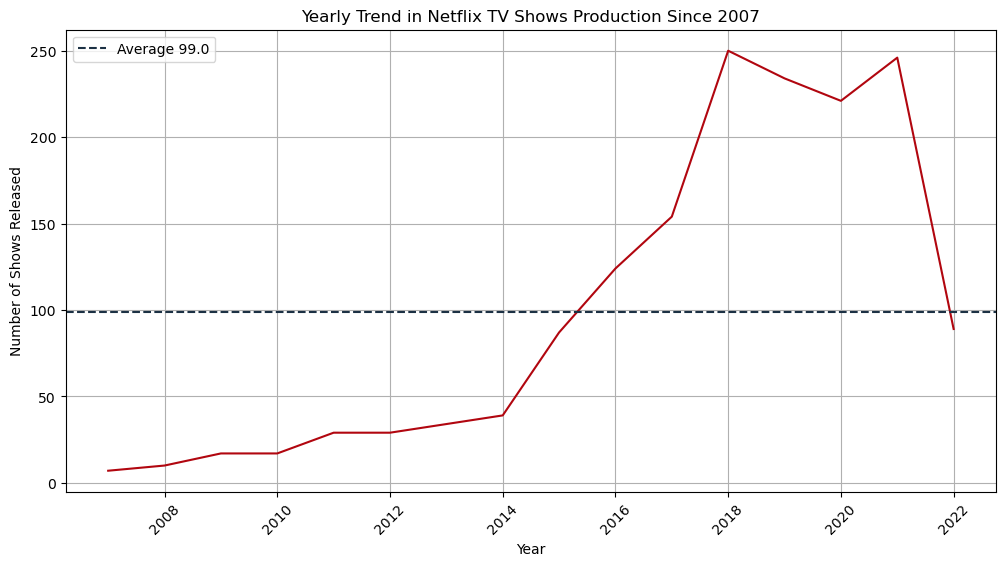

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting the yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, color="#B1060F") 
plt.title('Yearly Trend in Netflix TV Shows Production Since 2007')
plt.xlabel('Year')
plt.ylabel('Number of Shows Released')
plt.xticks(rotation=45)
plt.grid(True)

# Calculate the average and add a horizontal line
average_shows = yearly_trend.mean().round()
plt.axhline(y=average_shows, color='#1C3144', linestyle='--', label=f'Average {average_shows}')
plt.legend()

plt.show()
plt.savefig("Images/02_Yearly_Trend_In_Shows.png")

In [19]:
# Function to convert string representation of list to actual list
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return []

# Apply the function to genres and language columns
streaming_data['genres'] = netflix_data['genres'].apply(convert_string_to_list)
streaming_data['language'] = netflix_data['language'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Display the cleaned data
streaming_data[['release_year', 'genres', 'language']].head()


,release_year,genres,language
0,2008,"[comedy, european]","[English, Arabic, French, German, Italian, Man..."
1,2010,[comedy],"[English, German]"
2,2010,[comedy],[English]
3,2010,"[action, scifi, crime, drama]",[English]
4,2009,"[family, comedy, music, action, animation, fan...","[Spanish, French, Chinese, Japanese, English]"


In [20]:
# Exploding the genres and language columns to have separate rows for each genre and language
genre_data = streaming_data.explode('genres')
language_data = streaming_data.explode('language')

# Grouping by release year and genres, then counting the occurrences
genre_count_over_years = genre_data.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Similarly, grouping by release year and language
language_count_over_years = language_data.groupby(['release_year', 'language']).size().reset_index(name='count')


In [32]:
genre_count_over_years

,release_year,genres,count
0,2007,action,3
1,2007,animation,2
2,2007,comedy,6
3,2007,crime,1
4,2007,drama,3
...,...,...,...
259,2022,reality,10
260,2022,romance,9
261,2022,scifi,11
262,2022,sport,2


In [ ]:
# Preparing the data for the heatmap
genre_heatmap_data = genre_count_over_years.pivot("genres", "release_year", "count")
genre_heatmap_data = genre_heatmap_data.fillna(0)  # Replacing NaN with 0

# Plotting the heatmap for genres
plt.figure(figsize=(20, 10))
sns.heatmap(genre_heatmap_data, cmap="YlGnBu", annot=False, linewidths=.5)
plt.title('Heatmap of Genre Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("Images/02_Genre_Count")

In [38]:
language_count_over_years

,release_year,language,count
0,2007,English,6
1,2007,French,1
2,2008,Arabic,1
3,2008,English,9
4,2008,French,2
...,...,...,...
293,2022,Swedish,1
294,2022,Thai,1
295,2022,Tswana,1
296,2022,Turkish,1


In [50]:
#Only account for non-English languages for shows
foreign_language_count = language_count_over_years.loc[language_count_over_years['language']!= "English"]
foreign_language_count

,release_year,language,count
1,2007,French,1
2,2008,Arabic,1
4,2008,French,2
5,2008,German,1
6,2008,Irish Gaelic,1
...,...,...,...
293,2022,Swedish,1
294,2022,Thai,1
295,2022,Tswana,1
296,2022,Turkish,1


In [51]:
# Summing up the counts for each language across all years
total_shows_per_language = foreign_language_count.groupby('language')['count'].sum()

# Display the total shows per language
total_shows_per_language.reset_index(name='Total Shows from 2007 to 2022')
total_shows_per_language

language
Afrikaans       1
Arabic         36
Aramaic         1
Azerbaijani     1
Bable           1
               ..
Vietnamese      2
Welsh           2
Xhosa           1
Yiddish         2
Zulu            3
Name: count, Length: 76, dtype: int64

In [52]:
# Calculate the average (mean) and Q1 (25th percentile) of the total counts
average_total_shows = total_shows_per_language.mean()
q1_total_shows = total_shows_per_language.quantile(0.25)

print(f"Mean: {average_total_shows}")
print(f" Q1: {q1_total_shows}")

Mean: 12.671052631578947
 Q1: 1.0


*Average Total Shows per Language*: Approximately 12.86 shows
*Q1 (25th Percentile) of Total Shows per Language*: 1 show

These statistics indicate that, on average, there are about 12.86 shows produced per language. However, the Q1 value of 1 suggests that at least 25% of the languages have only 1 show produced in this time period, highlighting a significant variation in content production across different languages.

To aid with visualisation of trends, the lower quartile is dropped. 

In [53]:
# Dropping languages with only one show produced
languages_more_than_one_show = total_shows_per_language[total_shows_per_language > 1]

# Display the updated counts
languages_more_than_one_show.reset_index(name='Total Shows from 2007 to 2022')
languages_more_than_one_show

language
Arabic           36
Bulgarian         2
Cantonese         5
Catalan           5
Chinese          35
Danish           11
Dutch            12
Filipino          4
Finnish           3
Flemish           2
French           76
German           38
Greek             3
Hebrew            9
Hindi            24
Icelandic         2
Indonesian        2
Irish Gaelic      3
Italian          30
Japanese        150
Korean           97
Latin             7
Mandarin         59
Min Nan           3
Nepali            2
None              2
Norwegian         6
Persian           3
Polish           10
Portuguese       38
Romanian          3
Russian          25
Sotho             2
Spanish         165
Swedish          12
Tagalog           3
Thai              7
Turkish          20
Ukrainian         4
Urdu              2
Vietnamese        2
Welsh             2
Yiddish           2
Zulu              3
Name: count, dtype: int64

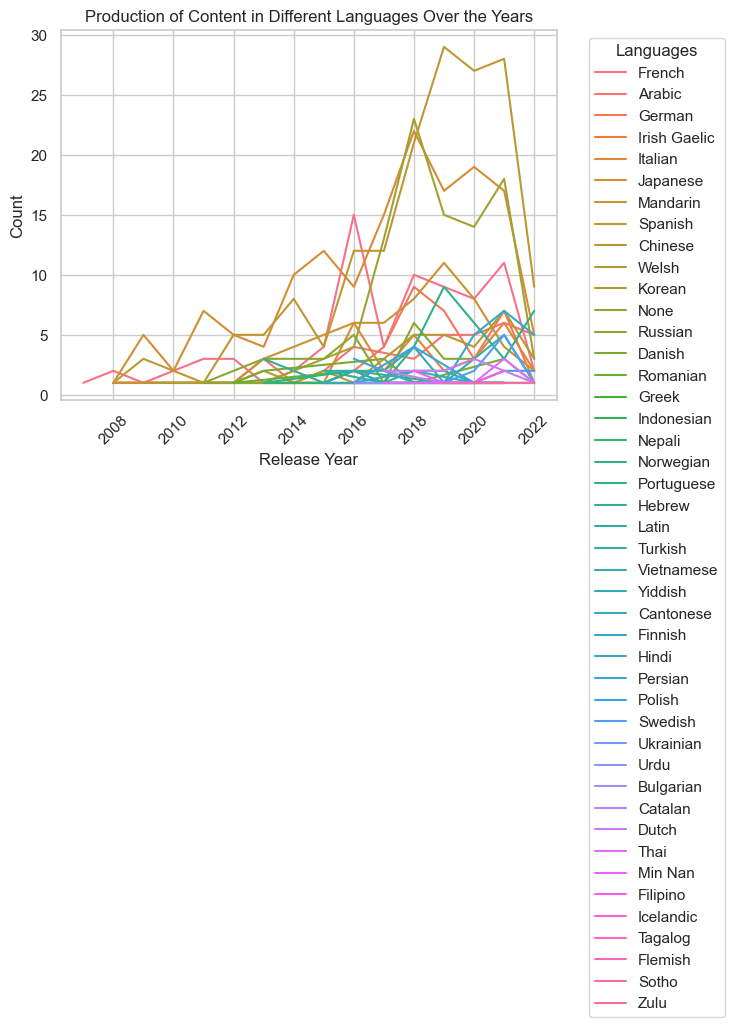

<Figure size 640x480 with 0 Axes>

In [57]:
# Filtering the original language count data to include only the remaining languages
heatmap_data_filtered = foreign_language_count[foreign_language_count['language'].isin(languages_more_than_one_show.index)]

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting languages over the years
sns.lineplot(data=heatmap_data_filtered, x="release_year", y="count", hue="language", )
plt.title('Production of Content in Different Languages Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.show()
plt.savefig(("Images/02_Yearly_Trend_In_Languages.png"))

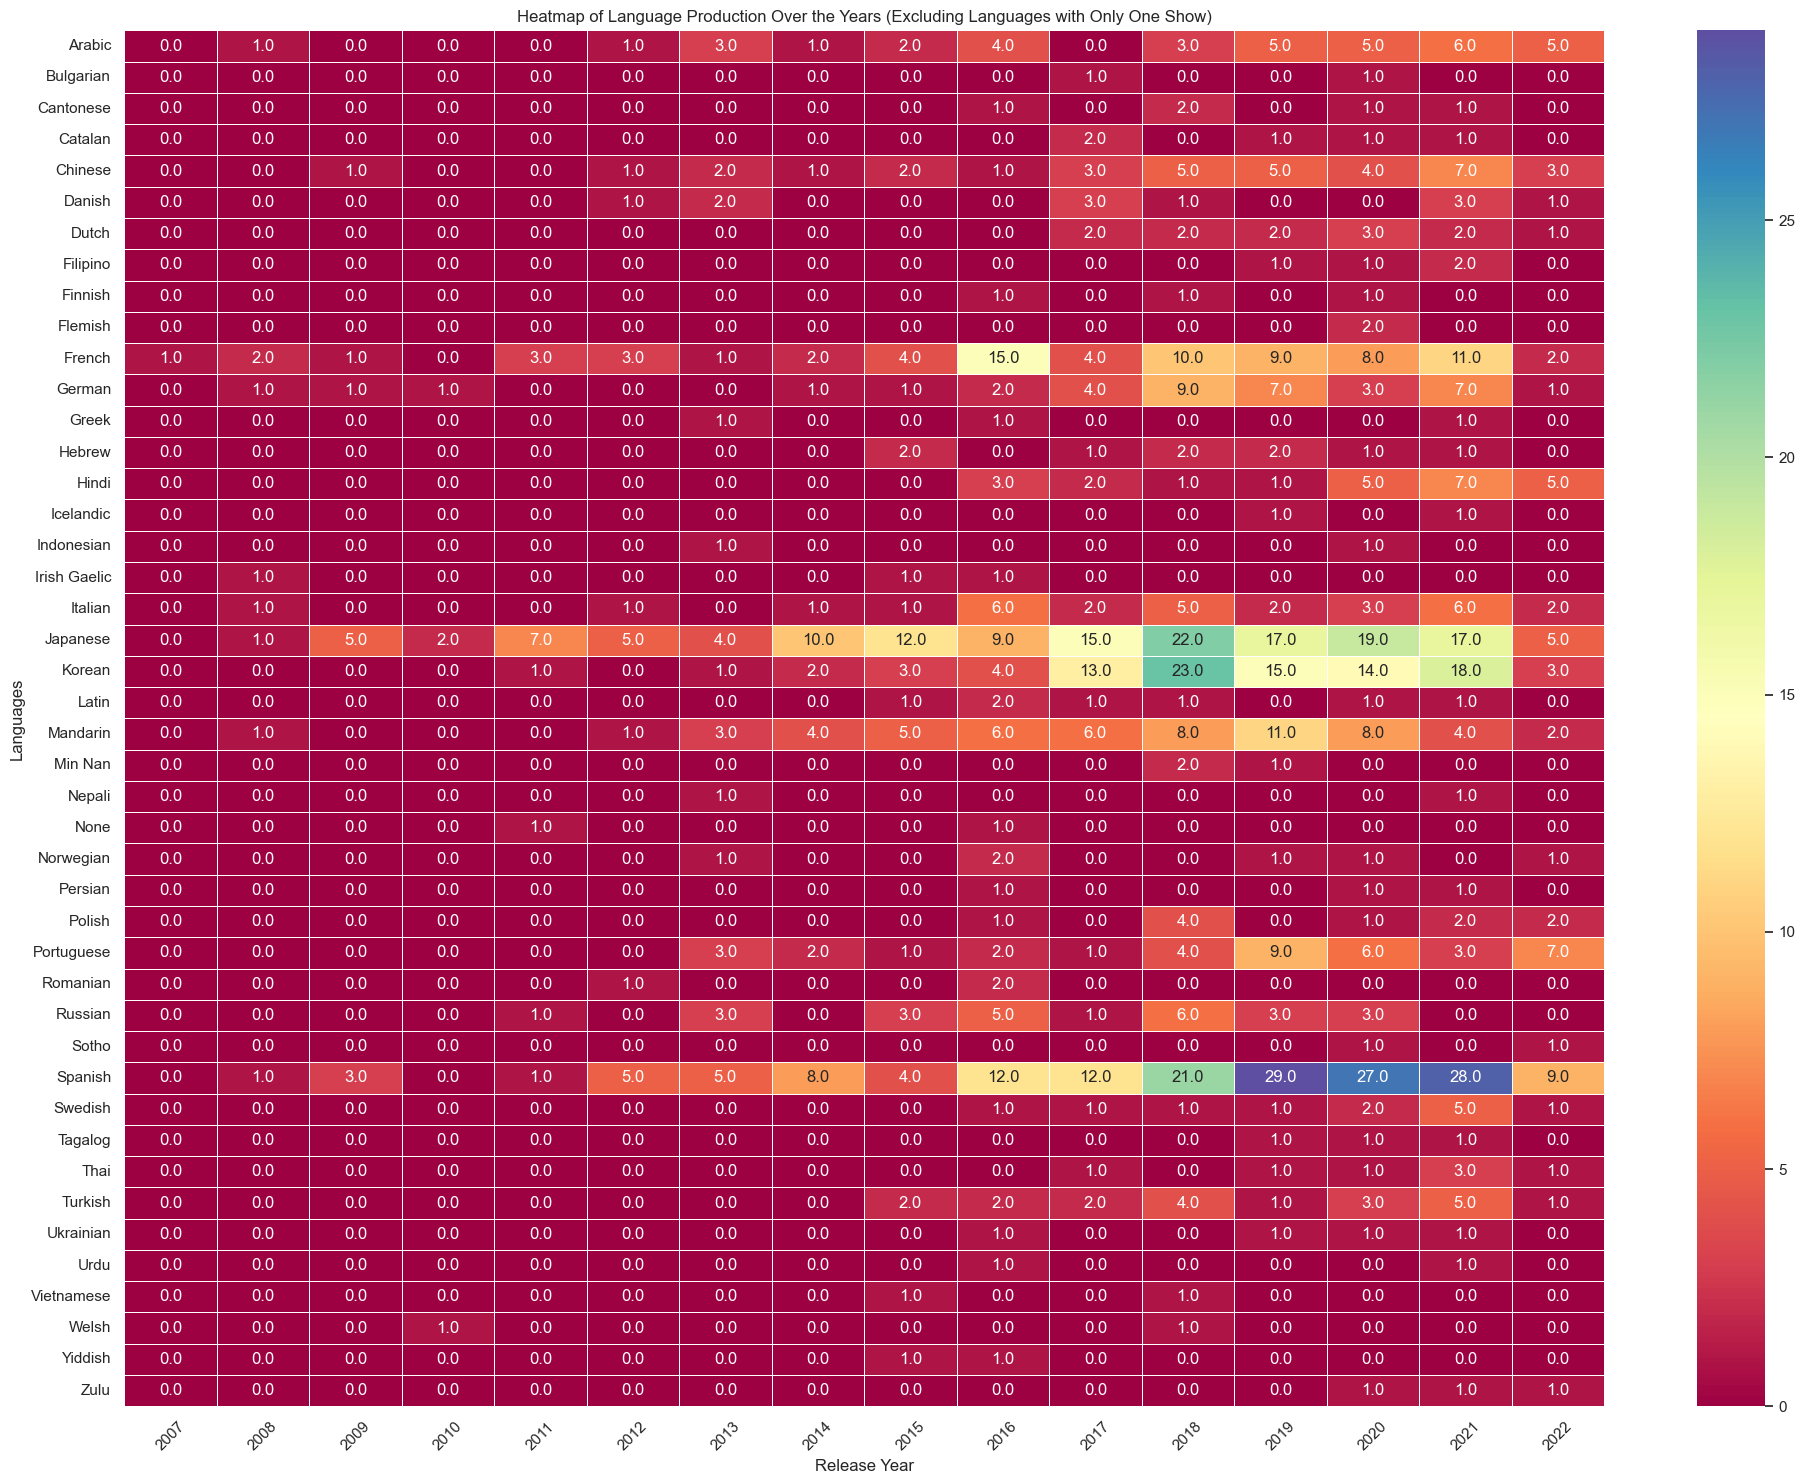

In [54]:
# Preparing the data for the heatmap
heatmap_data_final = heatmap_data_filtered.pivot(index='language', columns='release_year', values='count')
heatmap_data_final = heatmap_data_final.fillna(0)  # Replace NaN with 0

# Plotting the heatmap with annotations and a diverging color palette
plt.figure(figsize=(20, 15))  # Increased figure size for readability
sns.heatmap(heatmap_data_final, cmap="Spectral", annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Language Production Over the Years (Excluding Languages with Only One Show)')
plt.xlabel('Release Year')
plt.ylabel('Languages')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show and save the plot
plt.savefig("Images/02_Heatmap_Trend_In_Foreign_Languages.png")
plt.show()